# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits 
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item() 
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}") 
    ```


---

## 3. Finetuning 

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**: 
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

## Punto 1

In [2]:
import matplotlib.pyplot as plt
import torch
from transformers import ViTForImageClassification, ViTImageProcessor
from transformers import TrainingArguments, Trainer
import numpy as np
from torch.utils.data import DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device) # Expected: ‘cuda’ if Linux else ‘mps’ if MacOS
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

cuda


In [4]:
# Optimización
torch.set_float32_matmul_precision("medium") # optimizacion
import os
os.environ["WANDB_DISABLED"] = "true" # no utilizamos weights and biases

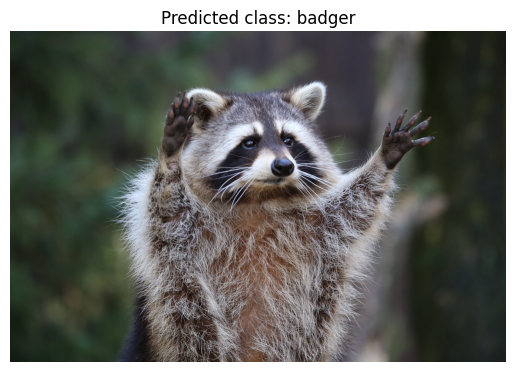

In [5]:
# Elijo un modelo y pruebo con una imagen

path = "raccoon.jpg"
image = Image.open(path)

# Elijo el model base de vision transformer de google vit-base-patch32-384
# Elijo este modelo porque es un modelo base que usa Vision Transformer 
# y está preparado para hacer ajuste con otros datasets
model_name = 'google/vit-base-patch32-384'

processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
# print("Predicted class:", model.config.id2label[predicted_class_idx])
predicted_class = model.config.id2label[predicted_class_idx]

plt.imshow(image)

plt.imshow(image)
plt.axis('off') 
plt.title(f'Predicted class: {predicted_class}') 
plt.show()


In [6]:
# Elijo un dataset
# Elijo un dataset de imágenes cerebrales, las cuales están etiquetadas por 
# tipo de tumor. La idea es ajustar el modelo para predecir el tipo de tumor


from datasets import load_dataset
dataset_name = 'sartajbhuvaji/Brain-Tumor-Classification'
train_dataset = load_dataset(dataset_name, split='Training')
test_dataset = load_dataset(dataset_name, split='Testing')



In [7]:
train_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 2870
})

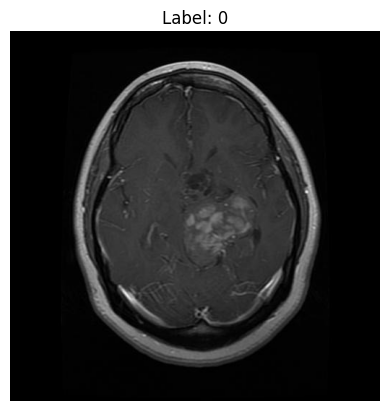

In [14]:
item = train_dataset[0]  # For example, the first image in the dataset
# Display the image
plt.imshow(item['image'])
plt.title(f"Label: {item['label']}")
plt.axis('off')  # Hide the axes for clarity
plt.show()

In [8]:
# Analisis de las clases
id2label = {id:label for id, label in enumerate(train_dataset.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
numclasses = len(id2label)
print('Clases = ',id2label)
print('Cantidad de clases = ', numclasses)

Clases =  {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
Cantidad de clases =  4


In [9]:
# Transformaciones
def transform(example):
    # Apply feature extractor transforms (resize, normalize, convert to tensor)
    inputs = processor(images=example['image'], return_tensors="pt")
    example['pixel_values'] = inputs['pixel_values'].squeeze()  # Remove extra dimension
    example['label'] = example['label']
    return example


train_dataset = train_dataset.map(transform)
test_dataset = test_dataset.map(transform)

train_dataset.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset.set_format(type='torch', columns=['pixel_values', 'label'])

test_dataset[0]['pixel_values'].shape

torch.Size([3, 384, 384])

In [11]:
train_dataset.features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'], id=None),
 'pixel_values': Sequence(feature=Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None), length=-1, id=None)}

In [12]:
print(model.classifier)

Linear(in_features=768, out_features=1000, bias=True)


In [13]:
# Evalúo accuracy del modelo base sin fine tuning
model.classifier = torch.nn.Linear(in_features=768, out_features=numclasses, bias=True)
test_loader = DataLoader(test_dataset, batch_size=32)

model.to(device)
# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 30.71%


In [23]:
model_ft.config.id2label = id2label

In [31]:
model_ft.config.label2id = label2id
label2id

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [36]:
for name, param in model.named_parameters():  
    print(name,param.requires_grad)

vit.embeddings.cls_token True
vit.embeddings.position_embeddings True
vit.embeddings.patch_embeddings.projection.weight True
vit.embeddings.patch_embeddings.projection.bias True
vit.encoder.layer.0.attention.attention.query.weight True
vit.encoder.layer.0.attention.attention.query.bias True
vit.encoder.layer.0.attention.attention.key.weight True
vit.encoder.layer.0.attention.attention.key.bias True
vit.encoder.layer.0.attention.attention.value.weight True
vit.encoder.layer.0.attention.attention.value.bias True
vit.encoder.layer.0.attention.output.dense.weight True
vit.encoder.layer.0.attention.output.dense.bias True
vit.encoder.layer.0.intermediate.dense.weight True
vit.encoder.layer.0.intermediate.dense.bias True
vit.encoder.layer.0.output.dense.weight True
vit.encoder.layer.0.output.dense.bias True
vit.encoder.layer.0.layernorm_before.weight True
vit.encoder.layer.0.layernorm_before.bias True
vit.encoder.layer.0.layernorm_after.weight True
vit.encoder.layer.0.layernorm_after.bias Tru

In [38]:
# Fine tuning

model_ft = ViTForImageClassification.from_pretrained(model_name, num_labels=numclasses, ignore_mismatched_sizes=True)
model_ft.classifier = torch.nn.Linear(in_features=768, out_features=numclasses, bias=True)
model_ft.config.id2label = id2label
model_ft.config.label2id = label2id

training_args = TrainingArguments(
    output_dir="./vit-finetuned-Brain-Tumor-Classification",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,    
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model_ft,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    #compute_metrics=compute_metrics,
)

trainer.train()

loading configuration file config.json from cache at D:\Users\juanp_schamun\.cache\huggingface\hub\models--google--vit-base-patch32-384\snapshots\d285164d04ed60526ea1b462ba8cc7afbe53a31b\config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch32-384",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 32,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

loading weights file model.safetensors from cache at 

  0%|          | 0/540 [00:00<?, ?it/s]

The following columns in the evaluation set don't have a corresponding argument in `ViTForImageClassification.forward` and have been ignored: image. If image are not expected by `ViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 16


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.9995006322860718, 'eval_runtime': 5.5728, 'eval_samples_per_second': 70.7, 'eval_steps_per_second': 4.486, 'epoch': 1.0}


The following columns in the evaluation set don't have a corresponding argument in `ViTForImageClassification.forward` and have been ignored: image. If image are not expected by `ViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 16


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 1.010848045349121, 'eval_runtime': 5.5801, 'eval_samples_per_second': 70.608, 'eval_steps_per_second': 4.48, 'epoch': 2.0}


Saving model checkpoint to ./vit-finetuned-Brain-Tumor-Classification\checkpoint-500
Configuration saved in ./vit-finetuned-Brain-Tumor-Classification\checkpoint-500\config.json


{'loss': 0.2019, 'grad_norm': 0.6435052752494812, 'learning_rate': 1.5185185185185186e-06, 'epoch': 2.78}


Model weights saved in ./vit-finetuned-Brain-Tumor-Classification\checkpoint-500\model.safetensors
Saving model checkpoint to ./vit-finetuned-Brain-Tumor-Classification\checkpoint-540
Configuration saved in ./vit-finetuned-Brain-Tumor-Classification\checkpoint-540\config.json
Model weights saved in ./vit-finetuned-Brain-Tumor-Classification\checkpoint-540\model.safetensors
The following columns in the evaluation set don't have a corresponding argument in `ViTForImageClassification.forward` and have been ignored: image. If image are not expected by `ViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 16


  0%|          | 0/25 [00:00<?, ?it/s]



Training completed. Do not forget to share your model on huggingface.co/models =)




{'eval_loss': 1.1518155336380005, 'eval_runtime': 5.4316, 'eval_samples_per_second': 72.538, 'eval_steps_per_second': 4.603, 'epoch': 3.0}
{'train_runtime': 165.5412, 'train_samples_per_second': 52.011, 'train_steps_per_second': 3.262, 'train_loss': 0.1886508208734018, 'epoch': 3.0}


TrainOutput(global_step=540, training_loss=0.1886508208734018, metrics={'train_runtime': 165.5412, 'train_samples_per_second': 52.011, 'train_steps_per_second': 3.262, 'total_flos': 2.0003285111891558e+18, 'train_loss': 0.1886508208734018, 'epoch': 3.0})

In [39]:
# Pruebo el accuracy del modelo con fine-tuning
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model_ft.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model_ft(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 74.62%


In [37]:
# liberar memoria
torch.cuda.empty_cache()

In [40]:
outputs = trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `ViTForImageClassification.forward` and have been ignored: image. If image are not expected by `ViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 394
  Batch size = 16


  0%|          | 0/25 [00:00<?, ?it/s]

In [40]:
# liberar memoria
torch.cuda.empty_cache()

In [41]:
outputs.metrics

{'test_loss': 1.1518155336380005,
 'test_runtime': 5.4795,
 'test_samples_per_second': 71.904,
 'test_steps_per_second': 4.562}

In [42]:
labels = id2label
labels

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

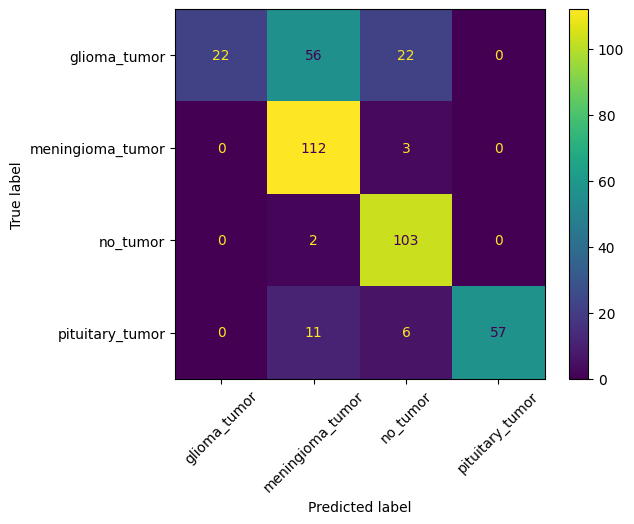

In [43]:
# Confussion Matrix

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

y_pred_filtered = np.where(y_pred < len(labels), y_pred, -1)

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_dataset.features['label'].names
cm = confusion_matrix(y_true, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels )
disp.plot(xticks_rotation=45)

## Punto 2

1. 
- Elijo el model base de vision transformer de google vit-base-patch32-384 \
porque es un modelo base que usa Vision Transformer que ya está preparado para la tarea de clasificación.
 - Elijo un dataset de imágenes cerebrales, las cuales están etiquetadas por \
tipo de tumor. La idea es ajustar el modelo para predecir el tipo de tumor. Es un dataset de un tamaño adecuado \
para fine tuning, y no muy grande, con lo cual permite entrenar rápidamente. Además está etiquetado.
2. El modelo base tiene una capa final lineal (clasiffier) que es la que luego de la extracción de características \
de las capas anteriores, realiza finalmente la clasificación. Lo que hace el proceso de fine tuning en este caso es \
reentrenar los parámetros de esta última capa, además de ajustar la dimensión de salida al número de clases.
3. El modelo sin ajustar arrojó un accuracy del 14.97% mientras que el modelo ajustado fue del 71.83%. \
Se ve una gran mejora gracias al fine-tuning